<a href="https://colab.research.google.com/github/seungyeons2/LA2/blob/main/smung_%EC%B1%8C%EB%A6%B0%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import PIL
from PIL import Image


In [9]:
plt.rcParams[ "figure.figsize" ] = (10, 10)
origin2D = np.array([0, 0])
origin3D = np.array([0, 0, 0])
scale = 10

##(행)벡터, 열벡터

In [10]:
print(np.array([1, 0])) # (행) 벡터
print(np.hstack([1, 9])) # horizontal로 stack 해라

print(np.vstack([1, 0])) # 열벡터 표현

[1 0]
[1 9]
[[1]
 [0]]


In [11]:
A = np.vstack([[4, 2], [1, 3]])
print("A:")
print(A, "\n")

e_values, e_vectors = npl.eig(A)
print(e_values)
print(e_vectors)

#eigen vector u1, u2
u1 = np.vstack(e_vectors[:, 0])
u2 = np.vstack(e_vectors[:, 1])
print("u1: ", u1)
print("u2: ", u2)

#eigen value lambda1, lambda2
l1, l2 = e_values[0], e_values[1]
print("eigen values: ", l1, l2, "\n")

#Check
print("Au1: ", np.dot(A, u1))
print("l1 * u1 : ", l1 * u1)

print("Au2: ", np.dot(A, u2))
print("l2*u2: ", l2 * u2)

A:
[[4 2]
 [1 3]] 

[5. 2.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
u1:  [[0.89442719]
 [0.4472136 ]]
u2:  [[-0.70710678]
 [ 0.70710678]]
eigen values:  5.0 2.0 

Au1:  [[4.47213595]
 [2.23606798]]
l1 * u1 :  [[4.47213595]
 [2.23606798]]
Au2:  [[-1.41421356]
 [ 1.41421356]]
l2*u2:  [[-1.41421356]
 [ 1.41421356]]


# Singular value decomposition (SVD)

##1) Smung 이미지 파일 파악

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=595x842 at 0x7F4F78A030A0>
PNG
(595, 842)
RGBA


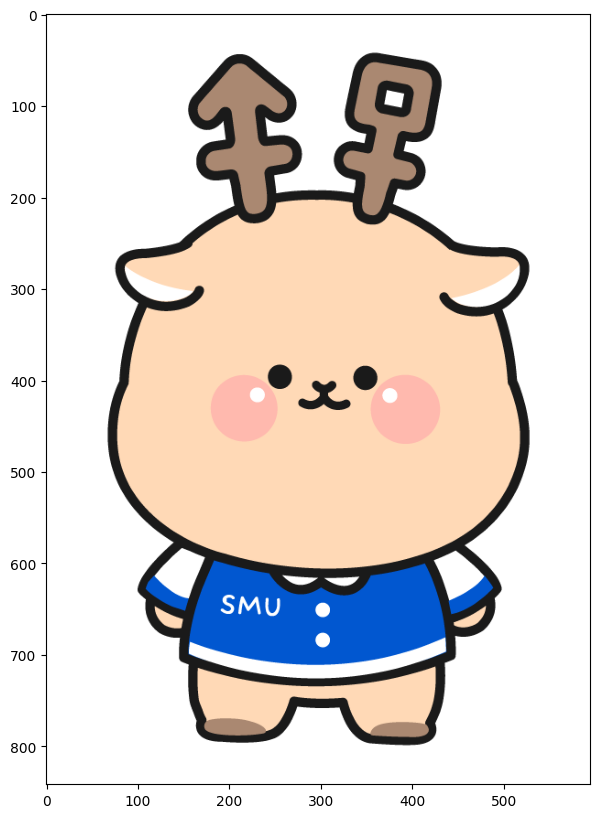

In [12]:
myImage = Image.open('smung.png')
print(myImage)
print(myImage.format)
print(myImage.size)
print(myImage.mode)

plt.imshow(myImage)
plt.show()

##2) 픽셀값 0~1 사이로 만들기

In [15]:
# RGB -> grayscale로 바꾸기
# numpy array로 바꾸기
# 0~1 사이 값으로 만들기
imMatrix = np.array(myImage.convert("L")).T / 255.0
print( imMatrix.shape )
print( imMatrix )

(595, 842)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##3) SVD 수행

In [16]:
scalar = 1 / 2 # Testing reconstruction of image.
shape = np.shape(imMatrix) # (h, w)
U, S, V = npl.svd(imMatrix)

# h x h identity matrix 곱하기 singular value (635, 635)
# w - h 만큼 뒤에 0 붙이기 (635, 960)
Sd = np.hstack([np.eye(shape[0]) * S.copy(), np.zeros((shape[0], shape[1] - shape[0]))])
print( np.shape(U), np.shape(Sd), np.shape(V) )


(595, 595) (595, 842) (842, 842)


True


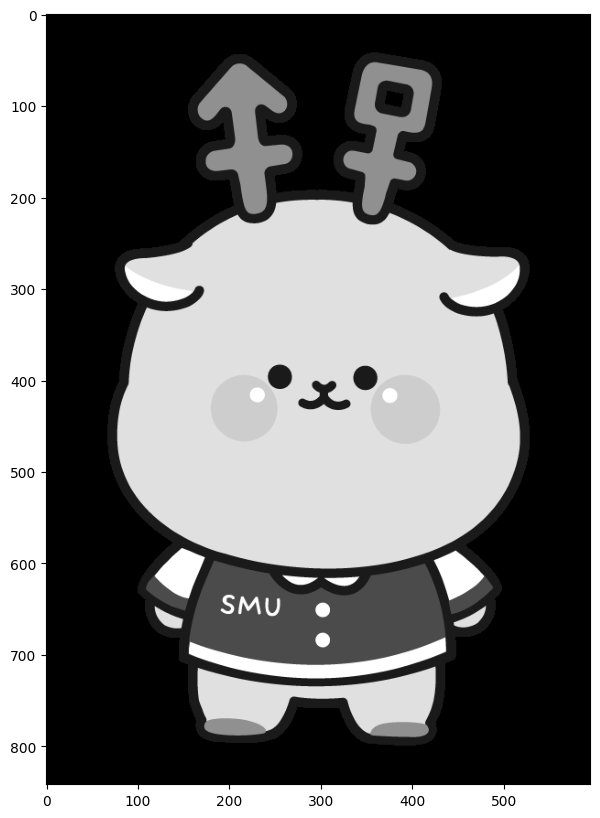

In [40]:
# --- Image reconstruction with the SVD ---
# Check 1. 원본 영상 vs. U x Sd x V

usv = U @ Sd @ V
print(np.allclose(imMatrix, usv))

# Check 2. U x Sd x V 그려보기
reconstructed_image = usv[:imMatrix.shape[0], :imMatrix.shape[1]]  # 입력 이미지의 크기로 조정
reconstructed_image = np.flipud(np.rot90(reconstructed_image))  # 시계 방향으로 90도 회전


plt.imshow(reconstructed_image, cmap='gray')
plt.show()


##4) $A_i$ 시각화

(595, 1)
(1, 1)
(1, 842)
2 [(595, 842), (595, 595), (595, 842), (842, 842)]
1438 500990 0.002870316772789876


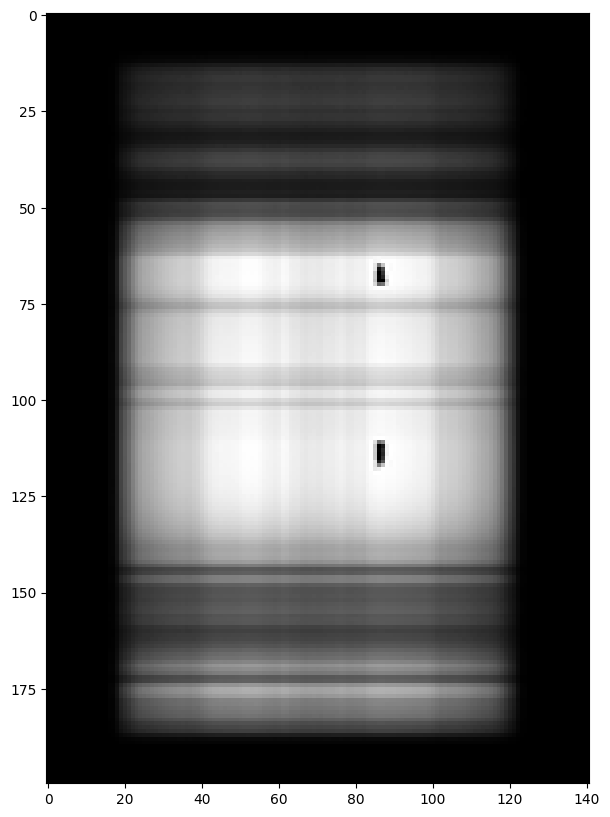

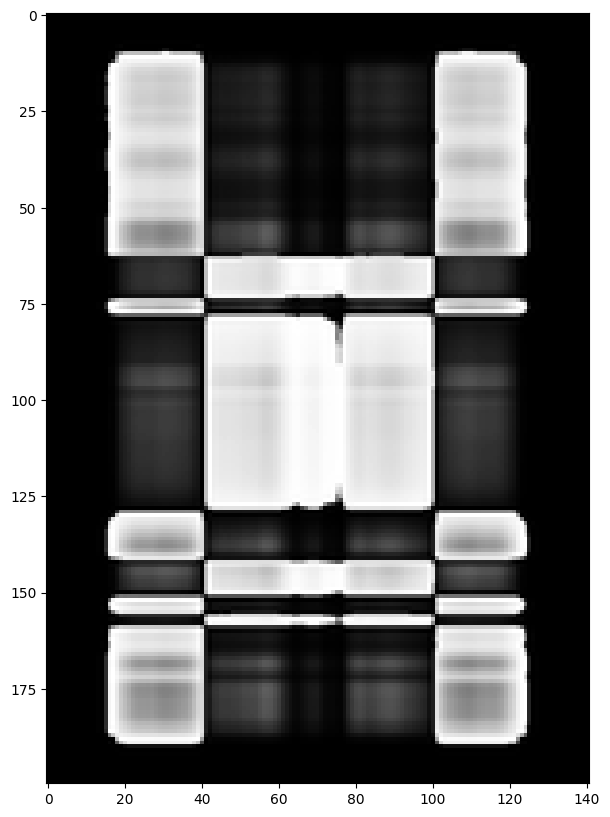

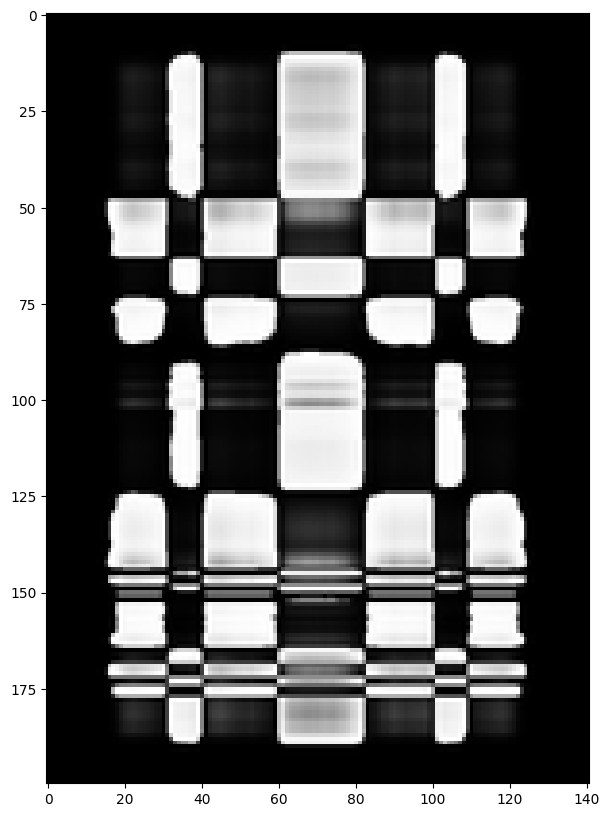

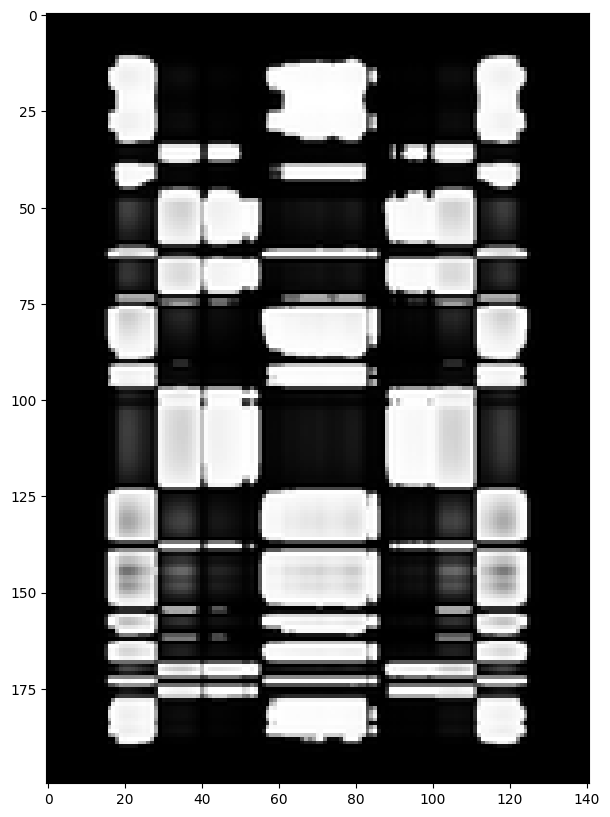

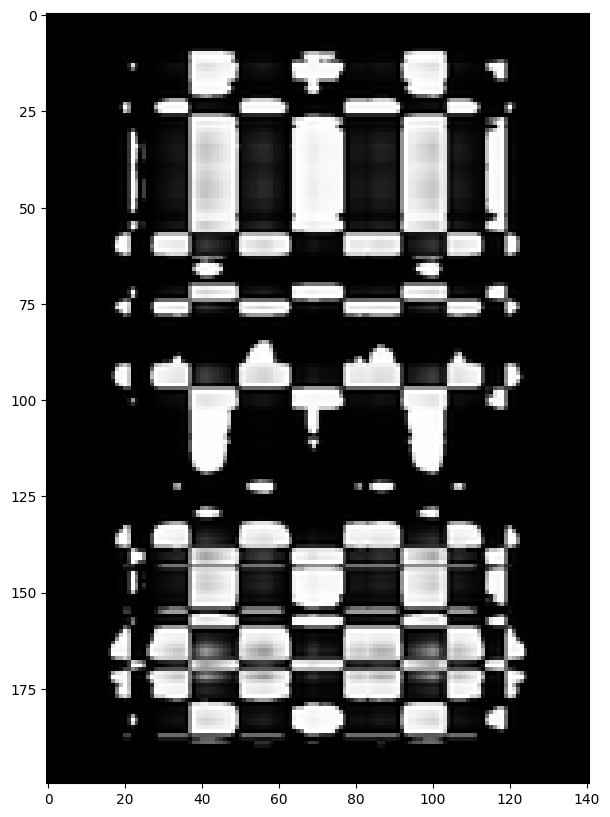

In [41]:
k = 1
print(np.shape(U[:, :k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:, :k].T))

m, n = np.shape(imMatrix)
partial, total = k * (m + n) + k, m * n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial / total)

size = (200, 200)

for i in range(1, 6):
    reconstructed_image = (U[:, i-1:i] @ np.diag(S[i-1:i]) @ V[i-1:i, :]).reshape(m, n) * 255
    reconstructed_image = np.flipud(np.rot90(reconstructed_image))
    reconstructed_image = np.fliplr(reconstructed_image)
    
    im = Image.fromarray(reconstructed_image.astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap='gray')
    plt.show()


##5) $ { A ̂(i) } $ 시각화

(5, 5)
(595, 5)
(5, 842)
2 [(595, 842), (595, 595), (595, 842), (842, 842)]
7190 500990 0.01435158386394938


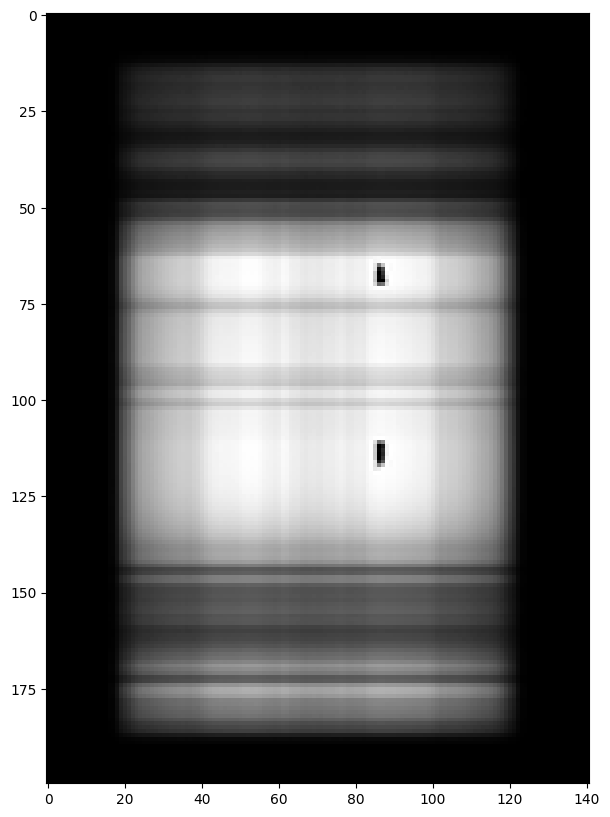

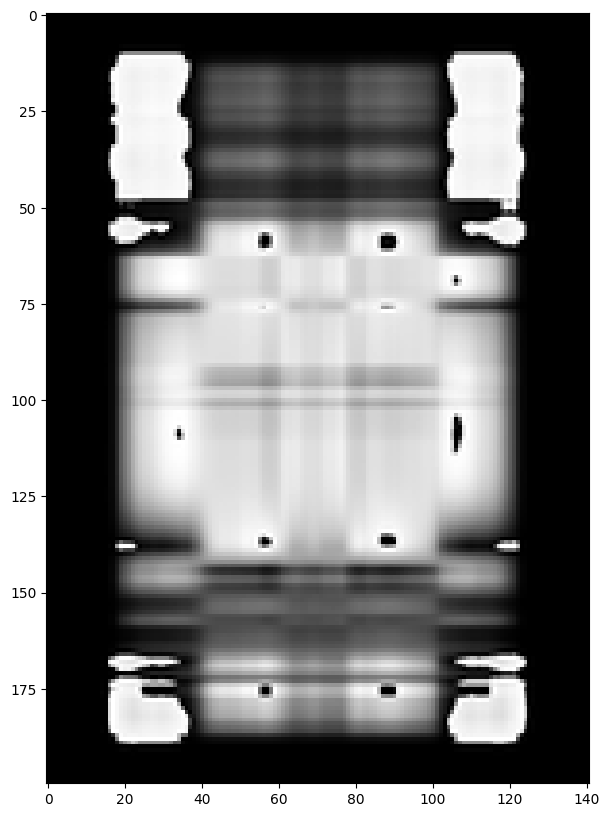

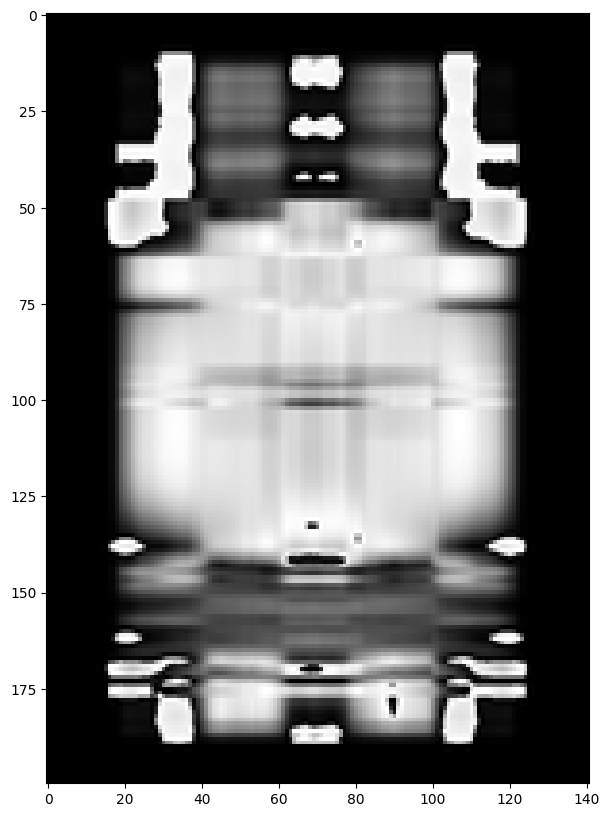

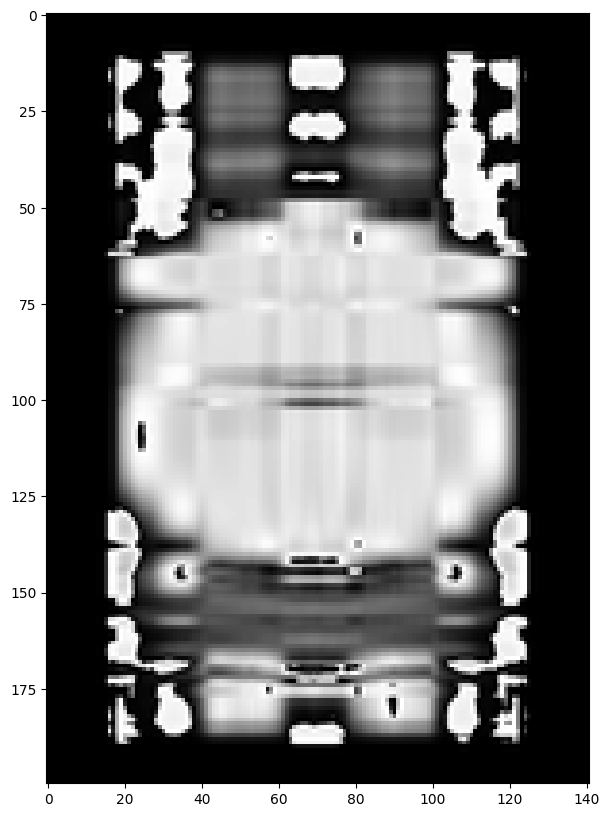

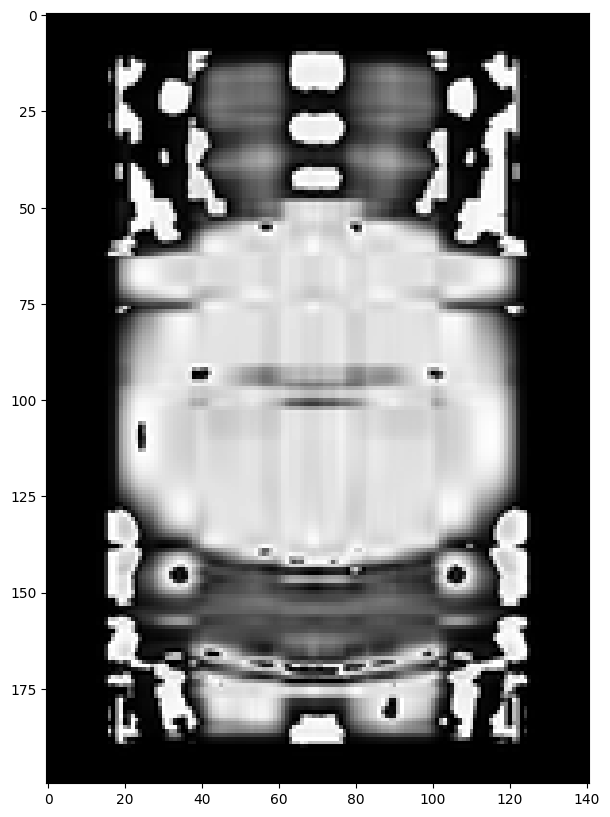

In [43]:
quality = 5
print(np.shape(np.diag(S[:quality])))
print(np.shape(U[:, :quality]))
print(np.shape(V[:quality]))

k = quality
m, n = np.shape(imMatrix)
partial, total = k * (m + n) + k, m * n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial / total)

size = (200, 200)

imtemp = lambda k: (U[:, :k] @ np.diag(S[:k]) @ V[:k, :]).reshape(m, n) * 255

for i in range(1, k + 1):
    reconstructed_image = imtemp(i)
    reconstructed_image = np.flipud(np.rot90(reconstructed_image))
    reconstructed_image = np.fliplr(reconstructed_image)
    
    im = Image.fromarray(reconstructed_image.astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap='gray')
    plt.show()


##6) Rank-k $ { A ̂(i) } $ 시각화


43140 500990 0.08610950318369628


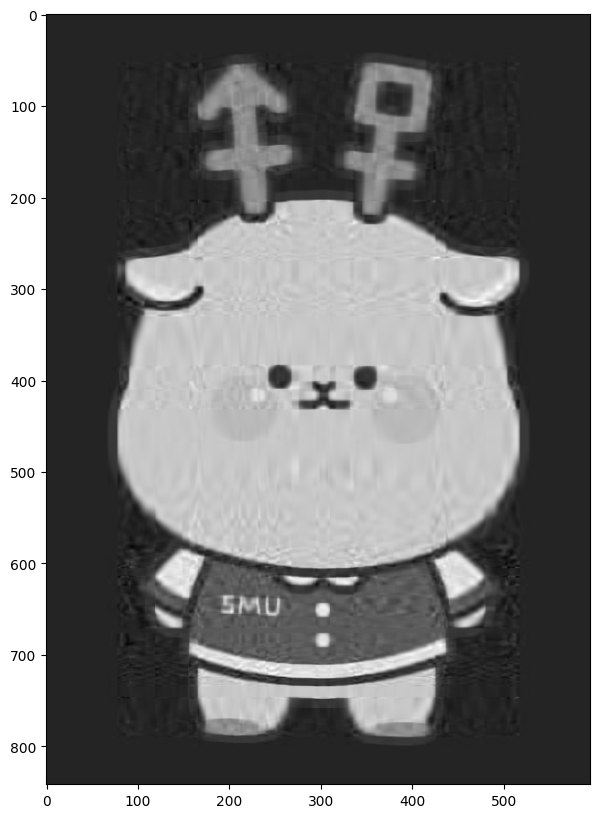

In [59]:
k = 30
im = imtemp(k)
m, n = np.shape(imMatrix)
partial, total = k * (m + n) + k, m * n
print(partial, total, partial / total)

reconstructed_image = im.reshape(m, n)
reconstructed_image = np.flipud(np.rot90(reconstructed_image))


plt.imshow(reconstructed_image, cmap='gray')
plt.show()
